# 1. Logistic map

In this interactive notebook, we will explore the **logistic map**.
The logistic map is a discrete dynamical system defined by the recurrence relation: 
$$x(t+1) = r x(t) (1 - x(t))$$
This equation became well known from the pioneering work of British mathematician and biologist Robert May in 1976. May used $x(t)$ to model the population size of a species in a given environment. The parameter $r$ represents the growth rate of the population. Since any environment can only support a limited number of individuals, May argued that the growth rate should decrease as the population grows, eventually becoming negative if the population exceeds the environment's carrying capacity. 
For further reading, see [Wikipedia: Logistic map](http://en.wikipedia.org/wiki/Logistic_map).

In this notebook, we will explore the behavior of the logistic map as we vary the parameter $r > 0$.

## Fixed points and stability

Let us first determine the fixed points of the logistic map. A fixed point is a value of $x^*$ that satisfies the equation $x(t+1) = x(t)$. Therefore, we need to solve the equation:
$$x^* = r x^* (1 - x^*)$$
$$x^* - r x^* + r x^{*2} = 0$$
$$x^* (1 - r + r x^*) = 0$$
Therefore, the fixed points are $x^*_1 = 0$ and $x^*_2 = 1 - \frac{1}{r}$.

It remains to see the stability of these fixed points. To do this, define the function $f(x) = r x (1 - x)$ and compute its derivative at the fixed points:
$$f'(x) = r (1 - 2x)$$
$$f'(x^*_1) = r$$
$$f'(x^*_2) = r \left(1 - 2\left(1 - \frac{1}{r}\right)\right) = -r+2$$

Therefore $|f'(x^*_1)| = r$ and $|f'(x^*_2)| =|r-2|.$ A fixed point $x^*$ is *stable* if $|f'(x^*)| < 1$ and *unstable* if $|f'(x^*)| > 1$.

Hence:
- $x^*_1 = 0$ is stable when $r < 1$ and unstable when $r > 1$
- $x^*_2 = 1 - \frac{1}{r}$ exists for $r > 1$ and is stable when $|2-r| < 1$, i.e., when $1 < r < 3$

Let us investigate the behavior of the system for different values of $r$.

## Cobweb plot and time series

Below you'll see an interactive plot that allows you to explore the behavior of the logistic map as we vary the parameter $r$ and the initial condition $x_0$.

Try to answer the following questions:

1. What is the behavior of the system for $r \leq 1$?
2. What is the behavior of the system for $1 < r < 3$?
   - Could you have predicted this behavior from the fixed points and their stability?
   - Does it matter whether $r$ is less than or greater than 2?
   - Does the behavior depend on the initial condition $x_0$?
3. What is the behavior of the system for $3 \leq r < 3.56995$?
   - Does the system approach a single fixed point or does it oscillate periodically between multiple values?
   - If it oscillates, how many values does it oscillate between? Does this number change as $r$ changes? Does it depend on $x_0$? Feel free to modify the implementation of the sliders in the code to zoom in on the behavior near $r=3.5$
4. What happens at $3.56995 \leq r < 4?$ What about $r=4$? 
   - How is this different from the period behavior from before?
   - How is this different from the behavior for $r > 4$? You might need to tweak the plot to zoom out further.
   - Could you have predicted this behavior from the fixed points and their stability?

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, Layout

%matplotlib inline

In [ ]:
def logistic_map(x, r):
    return r * x * (1 - x)

def plot_logistic(r=2.8, x0=0.1, n_iterations=50):
    # Create side-by-side plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Left plot: Cobweb diagram
    x = np.linspace(0, 1, 500)
    y = logistic_map(x, r)
    
    ax1.plot(x, y, 'b-', linewidth=2, label=f'f(x)={r:.1f}x(1-x)')
    ax1.plot(x, x, 'k--', linewidth=1, label='y=x')
    
    # Generate cobweb
    x_current = x0
    x_values = [x0]
    
    for i in range(n_iterations):
        x_next = logistic_map(x_current, r)
        ax1.plot([x_current, x_current], [x_current, x_next], 'r-', linewidth=0.8, alpha=0.6)
        ax1.plot([x_current, x_next], [x_next, x_next], 'r-', linewidth=0.8, alpha=0.6)
        x_values.append(x_next)
        x_current = x_next
    
    ax1.plot(x0, x0, 'go', markersize=6, label=f'x(0)={x0:.2f}')
    
    # Mark fixed points on cobweb diagram
    # Fixed point 1: x* = 0 (always exists)
    ax1.plot(0, 0, 'ko', markersize=8, label='x*=0', zorder=10)
    
    # Fixed point 2: x* = (r-1)/r (exists when r > 1)
    if r > 1:
        fp2 = 1 - 1/r
        ax1.plot(fp2, fp2, 'mo', markersize=8, label=f'x*={fp2:.3f}', zorder=10)
    
    ax1.set_xlabel('x(t)')
    ax1.set_ylabel('f(x(t))')
    ax1.set_title('Cobweb Diagram')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    
    # Right plot: Time series
    ax2.plot(range(len(x_values)), x_values, 'b.-', markersize=4)
    
    # Add dashed line for second fixed point if it exists
    if r > 1:
        fp2 = (r - 1) / r
        ax2.axhline(y=fp2, color='magenta', linestyle='--', linewidth=1.5, 
                   alpha=0.7, label=f'x*_2={fp2:.3f}')
        ax2.legend()
    
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('x(t)')
    ax2.set_title('Time Series')
    ax2.grid(True, alpha=0.3)
    ax2.set_xlim(0, n_iterations)
    ax2.set_ylim(0, 1)
    
    plt.tight_layout()
    plt.show()

interact(plot_logistic,
         r=FloatSlider(min=0.5, max=5.0, step=0.01, value=2.8, description='r:',
                      layout=Layout(width='600px')),
         x0=FloatSlider(min=0.01, max=0.99, step=0.01, value=0.1, description='x(0):',
                       layout=Layout(width='600px')),
         n_iterations=IntSlider(min=10, max=200, step=10, value=50, description='iterations:',
                               layout=Layout(width='600px')));

interactive(children=(FloatSlider(value=2.8, description='r:', layout=Layout(width='600px'), max=5.0, min=0.5,…

## Bifurcation

In the previous section, you have probably noticed that as soon as $r$ exceeds 3, the system starts to exhibit periodic behavior. Additionally, you have probably noticed that initially, the system oscillates between two values, but for $r=3.45$ it starts to oscillate between 4 values, and for $r=3.55$ it oscillates between 8 values. Let us try to understand this dependence of the number of attractors on $r$ better.

Below, we have implemented a simulation that computes the first 1000 iterations for various values of $r,$ beginning with $x(0)=0.5$ Then, to see which values the system settles to, we plot the last 100 values for each $r.$ The resulting plot is known as the **bifurcation diagram**.

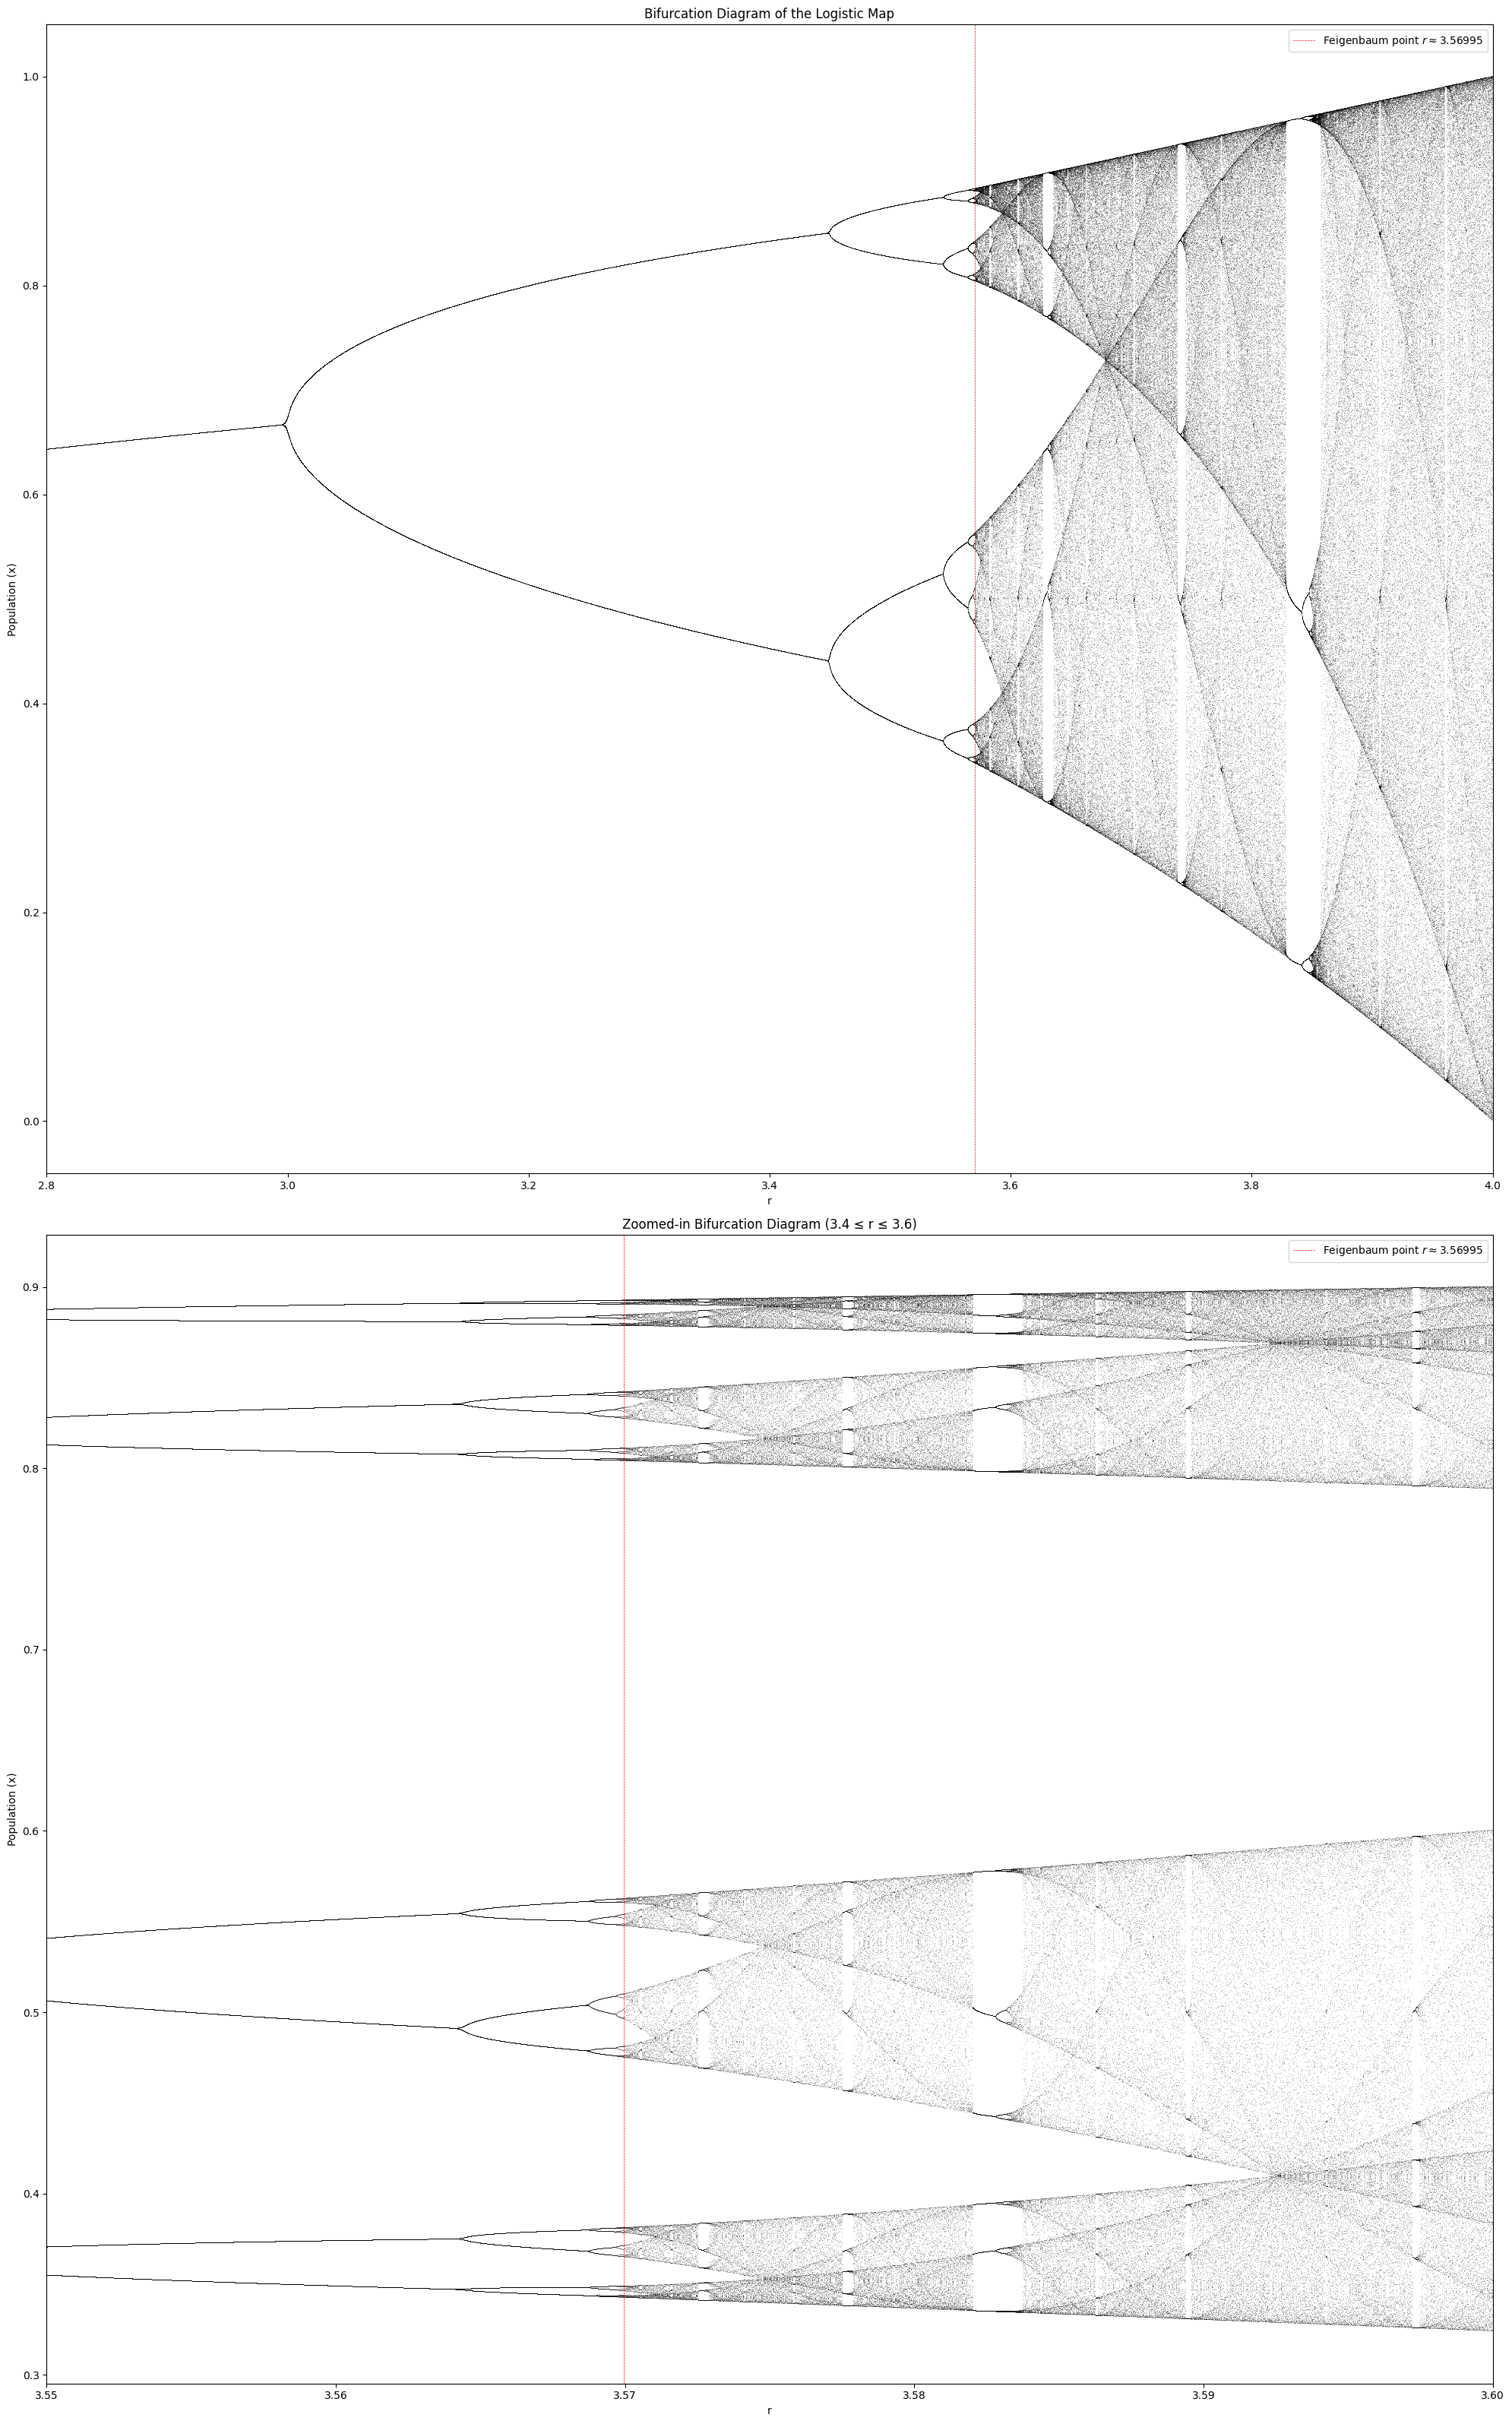

In [ ]:
# 1. Configuration
r_min, r_max = 2.8, 4
n_r = 10000          # Resolution of r (x-axis)
iterations = 1000    # Total iterations per r
last = 100           # Number of iterations to plot (the attractor)

# 2. Initialization
r = np.linspace(r_min, r_max, n_r)
x = 0.5 * np.ones(n_r)  # Start all r values at x = 0.5

# 3. Simulation: Full Bifurcation Diagram
fig, axs = plt.subplots(2, 1, figsize=(20, 32))
ax = axs[0]

for i in range(iterations):
    x = r * x * (1 - x)
    if i >= (iterations - last):
        ax.plot(r, x, ',k', alpha=0.25) # Plotting tiny pixels

# Add vertical line at period-doubling accumulation point (Feigenbaum point)
feigenbaum_point = 3.56995
ax.axvline(feigenbaum_point, color='red', linestyle='--', linewidth=0.5, 
           label=r'Feigenbaum point $r\approx 3.56995$')
ax.legend()

ax.set_xlim(r_min, r_max)
ax.set_title("Bifurcation Diagram of the Logistic Map")
ax.set_xlabel("r")
ax.set_ylabel("Population (x)")

# 4. Simulation: Zoomed-in Bifurcation Diagram (region 3.55-3.6)
# Reset for zoom-in
r_zoom_min, r_zoom_max = 3.55, 3.6
n_r_zoom = 5000
r_zoom = np.linspace(r_zoom_min, r_zoom_max, n_r_zoom)
x_zoom = 0.5 * np.ones(n_r_zoom)

ax_zoom = axs[1]

for i in range(iterations):
    x_zoom = r_zoom * x_zoom * (1 - x_zoom)
    if i >= (iterations - last):
        ax_zoom.plot(r_zoom, x_zoom, ',k', alpha=0.25)

ax_zoom.axvline(feigenbaum_point, color='red', linestyle='--', linewidth=0.5, 
                label=r'Feigenbaum point $r\approx 3.56995$')
ax_zoom.legend()

ax_zoom.set_xlim(r_zoom_min, r_zoom_max)
ax_zoom.set_title("Zoomed-in Bifurcation Diagram (3.55 ≤ r ≤ 3.6)")
ax_zoom.set_xlabel("r")
ax_zoom.set_ylabel("Population (x)")

plt.tight_layout()
plt.show()

Observe that at $r=3$ the system has a period-2 attractor, and at $r\approx3.45$ it has a period-4 attractor. We call such values branching points. In the table below, you can find the first 8 branching points.

| The kth branch | Period $2^k$ | Branch point $a_k$ |
|----------------|--------------|-------------------|
| 1 | 2 | 3.0000000 |
| 2 | 4 | 3.4494896 |
| 3 | 8 | 3.5440903 |
| 4 | 16 | 3.5644073 |
| 5 | 32 | 3.5687594 |
| 6 | 64 | 3.5696916 |
| 7 | 128 | 3.5698913 |
| 8 | 256 | 3.5699340 |

The branching points accumulate at $r_\infty = \lim_{k\to\infty} a_k = 3.569945672$. This value is known as the **Feigenbaum point** (named after its discoverer, the American mathematician Mitchell Feigenbaum) and is denoted by a red dashed line in the bifurcation diagrams above. When $r$ exceeds this value, the system exhibits chaotic behavior. Nonetheless, there are some windows of periodicity even in the chaotic regime, and the system can be periodic for certain values of $r$ even if $r > r_\infty$. For example, for $r = 1 + \sqrt{8}$ the system is periodic with period 3 (try $r=3.83$ in the interactive plot from before).